# 01 Deeplearning Basic Modeling

## Tensorflow를 활용한 딥러닝 기초 실습 가이드
1. 데이터셋 로드 및 탐색
    - fashion_mnist : 의류 사진 
        - 크기 : 28*28 (흑백)
        - train : 6만/ test : 1만
        - 라벨 : 10가지('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat' , 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

2. 모델 구축 : 우리가 원하는대로 하나씩 
    - tf.keras.Sequential()

3. 모델 컴파일 -> setting.   
    - optimizer(어떤 optimizer를 사용해서 gradient 업데이트 할건지)
    - loss(MSE, Log loss 등)
    - metric(평가지표)
    
4. 모델 학습
    - epoch
    - batchsize
    
5. 모델 평가

In [2]:
import tensorflow as tf

tf.__version__

'2.10.0'

텐서플로우 2.0 버전에서는 Keras가 기본 탑재가 되었고   
공식사이트에서도 Keras를 사용하기 때문에 저희도 Keras 위주로 진행을 하겠습니다.  
(keras 로 코딩을 하는게 훨씬 쉽습니다.)

In [3]:
from tensorflow.keras import datasets, layers, models #Tensorflow에 있는 Keras 함수들 호출하기

먼저, datasets 안에 들어있는 몇가지 예제 데이터들 중에,  
fashion_mnist 데이터를 사용해보겠습니다.

# 의류 이미지 예측하기

### 1. 데이터셋 로드 및 탐색
 - fashion_mnist : 의류 사진 
    - 크기 : 28*28 (흑백)
    - train : 6만/ test : 1만
    - 라벨 : 10가지('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat' , 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [4]:
fashion = datasets.fashion_mnist
fashion_data = fashion.load_data()
fashion_data

4422102/4422102 [==============================] - 1s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [5]:
len(fashion_data)

2

In [6]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_data 

In [7]:
train_imgs.shape, train_labels.shape, test_imgs.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
import numpy as np
n_class = np.unique(train_labels).shape[0]
n_class

10

**< dataset summary >**  
n_trainset = 60,000 / n_testset = 10,000  
1 image shape = 28 x 28 / 1 label shape = 1

In [9]:
train_imgs[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

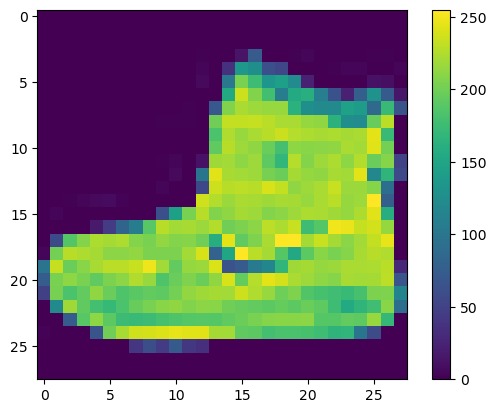

In [10]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.show()

In [11]:
train_labels[0]

9

데이터셋 안에 label의 이름이 없기 때문에, 직접 넣어줍니다.

In [12]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [13]:
label_names[train_labels[0]]

'Ankle boot'

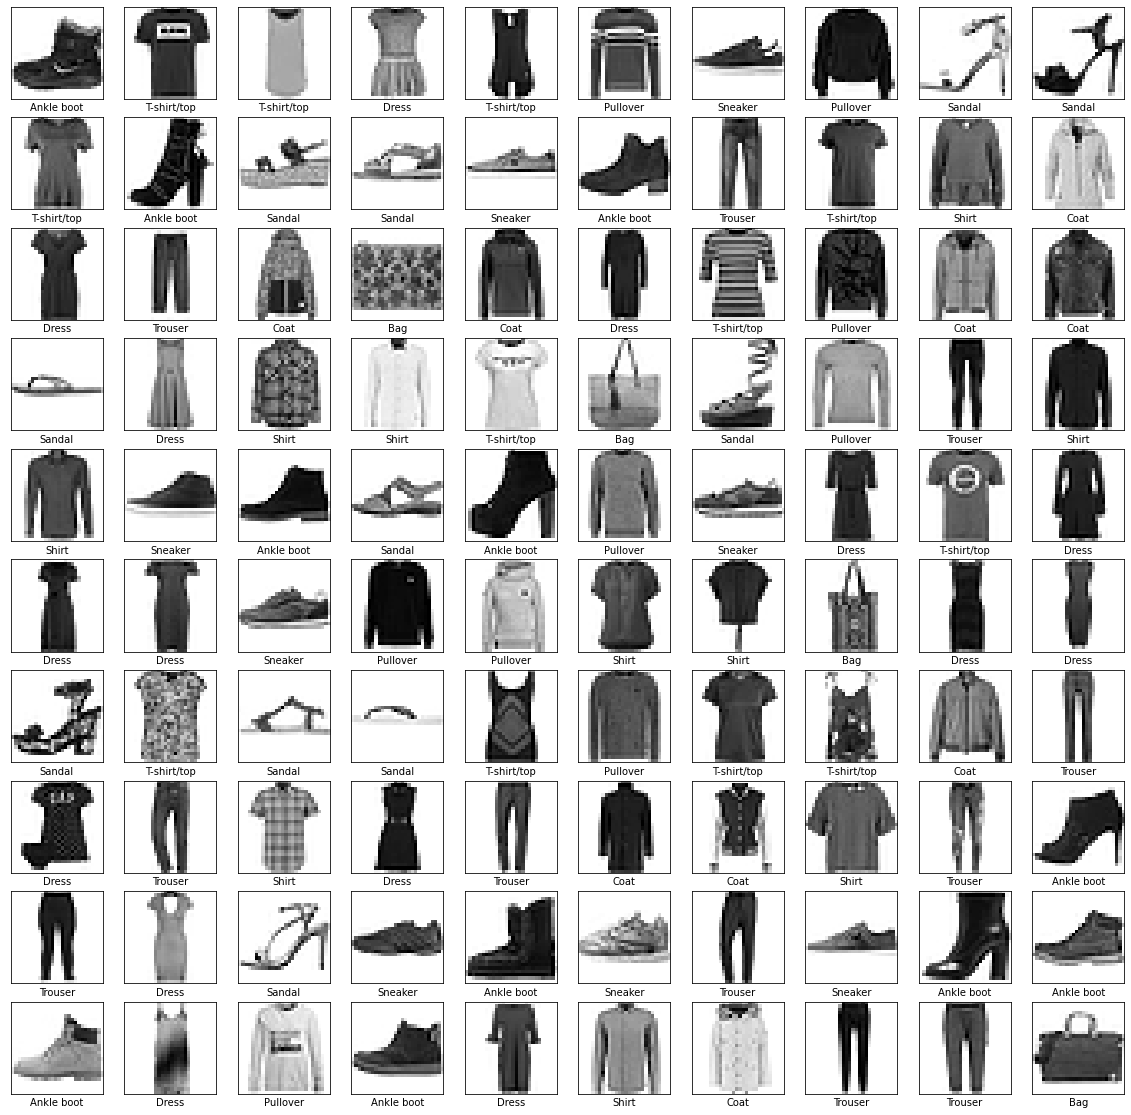

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[train_labels[i]])
plt.show()

### 2. 모델 구축 
- tf.keras.Sequential()
- 모델을 구축하는 가장 기본적인 방법으로 아래 두가지 방법이 있다.
1. model = tf.keras.Sequntial([ 입력층 , 은닉1층 , 은닉2층 , ... 출력층 ]) 와 같이, 리스트 형식으로 각 층을 묶어서 선언한다.
2. model = tf.keras.Sequential() 선언 후, model.add()를 이용해 한 층씩 쌓아준다.
  
- 입력층에서 가장 기본적인 방법은 Flatten()을 이용하여 1차원 형태로 받는 것이다.
    - Flatten()에서는 입력받을 데이터의 input_shape을 설정해줘야 한다.
- 각 층의 가장 기본적인 형태는 Dense()를 이용하여 "완전연결계층"형태로 구성하는 것이다.
    - Dense()에서는 먼저 뉴런의 개수(노드의 개수)를 설정해줘야 한다.
    - 활성화 함수 종류, 초기화방법 등을 설정해줄 수 있다.


In [14]:
# 기본 모델 = 완전연결계층 = Dense
# Sequential 안에 리스트로 하나하나 레이어 쌓는다.
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # 노드 개수, glorot_uniform = 자비에 초기화, bias_init은 보통 0으로 준다.
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(128, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='zeros'),
    tf.keras.layers.Dense(10, activation='softmax', kernel_initializer='glorot_uniform', bias_initializer='zeros')
    #  마지막꺼는 softmax.
])

### 3. 모델 컴파일
모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 컴파일 단계에서 추가됩니다:

- 옵티마이저(Optimizer) : 모델의 업데이트 방법(최적화 방법) 설정
    - adam, rmsprop, adagrad, sgd etc.
- 손실 함수(Loss function) : 훈련 시, 오차 측정 방식 설정  
    - binary_crossentropy : 이진 분류 시 사용
    - categorical_crossentropy : 다중 분류 시 one hot encoding label일 때 사용    
    -> 이미 원핫인코딩 되어있는거
    - sparse_categorical_crossentropy : 다중 분류 시 정수형 label일 때 사용   
    -> 넣으면 원핫인코딩 해준다    
       crossentropy : log function
- 지표(Metrics) : 훈련 시, 학습데이터과 검증데이터의 평가 지표 설정
    - 기본적으로 리스트 형태로 받도록 설정
    - accuracy, auc, precision, recall etc.
  
기본적으로 문자열 형태로 지정해주지만, 직접 함수를 지정해줄 수 있다.

In [15]:
# 문자열이 기본. optimizer의 옵션을 바꾸고싶으면 class로 불러온다.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 4. 모델 훈련
신경망 모델을 훈련하는 단계는 다음과 같습니다:  
.  
훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.  
모델이 train img와 train label의 관계를 학습힙니다.
- epochs : 학습데이터셋 학습 반복 횟수 
    - 책 몇 epoch 돌렸어? (책 몇번 봤어?)  
- batch_size : 1회 업데이트 시 학습하는 데이터 량
    - 한번 공부할 때 batch size가 어떻게 돼? (한번 공부할 때 몇 페이지씩 봐?)
- validation_data : 훈련 단계에서 검증할 데이터셋
- verbose : 시각화 방식

In [16]:
model.fit(train_imgs, train_labels, epochs=20, verbose=1, batch_size=100,
          validation_data=(test_imgs, test_labels))
# 여기서 vaildation을 넣는 이유는 여러번의 Epoch를 돌리면서 중간중간에 확인하기 위함.
# 당연히 원래는 validation set을 사용해야 한다.

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 3.2444 - accuracy: 0.7639 - val_loss: 0.6630 - val_accuracy: 0.7998
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.5283 - accuracy: 0.8301 - val_loss: 0.5339 - val_accuracy: 0.8276
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4272 - accuracy: 0.8516 - val_loss: 0.4610 - val_accuracy: 0.8439
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3832 - accuracy: 0.8648 - val_loss: 0.4289 - val_accuracy: 0.8534
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3612 - accuracy: 0.8708 - val_loss: 0.4511 - val_accuracy: 0.8465
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3664 - accuracy: 0.8677 - val_loss: 0.4001 - val_accuracy: 0.8603
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.3457 - accuracy: 0.8748 - val_loss: 0.4404 - val_accuracy: 0.8518
Epoch 

### 모델 평가

In [17]:
test_loss, test_acc = model.evaluate(test_imgs,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3720 - accuracy: 0.8735 - 425ms/epoch - 1ms/step

테스트 정확도: 0.8734999895095825


# 손글씨 이미지 예측하기

In [18]:
mnist = datasets.mnist
mnist_data = mnist.load_data()
mnist_data

11490434/11490434 [==============================] - 2s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [19]:
(train_imgs, train_labels), (test_imgs, test_labels) = mnist_data 

In [20]:
label_names = ['zero', 'one', 'two', 'three', 'four',
               'five', 'six', 'seven', 'eight', 'nine']

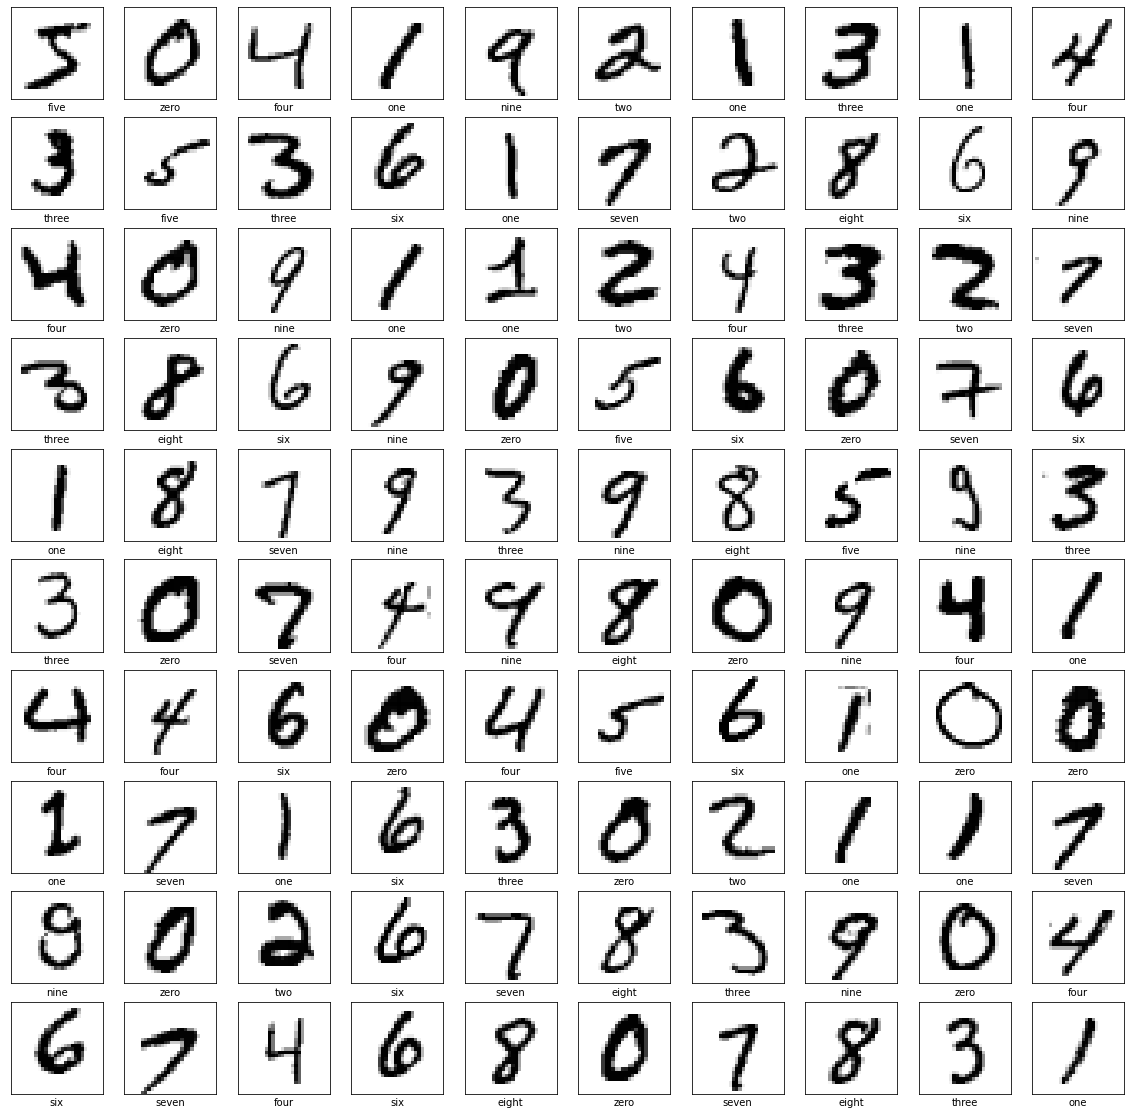

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[train_labels[i]])
plt.show()

In [46]:
# 위의 패션 예제와 같이 층을 쌓아보자.
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# 빈 리스트를 선언하고 append하는것처럼 빈 Sequential 선언하고 add 해준다. 동일함.

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [48]:
model.fit(train_imgs, train_labels, epochs=3, verbose=1, batch_size=64,
          validation_split = 0.2)
# validation_split : train data에서 20% 쪼개서 validation set로 만든다

Epoch 1/3
750/750 [==============================] - 2s 3ms/step - loss: 1.3918 - accuracy: 0.8876 - val_loss: 0.2548 - val_accuracy: 0.9406
Epoch 2/3
750/750 [==============================] - 2s 3ms/step - loss: 0.1951 - accuracy: 0.9478 - val_loss: 0.2058 - val_accuracy: 0.9478
Epoch 3/3
750/750 [==============================] - 2s 3ms/step - loss: 0.1313 - accuracy: 0.9629 - val_loss: 0.2049 - val_accuracy: 0.9502


In [49]:
test_loss, test_acc = model.evaluate(test_imgs,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.2029 - accuracy: 0.9489 - 310ms/epoch - 990us/step

테스트 정확도: 0.9488999843597412


In [56]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_imgs, train_labels, epochs=3, verbose=1, batch_size=30,
          validation_split = 0.2)
test_loss, test_acc = model.evaluate(test_imgs,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

Epoch 1/3
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4472 - accuracy: 0.8958 - val_loss: 0.1955 - val_accuracy: 0.9454
Epoch 2/3
1600/1600 [==============================] - 6s 4ms/step - loss: 0.1744 - accuracy: 0.9509 - val_loss: 0.1539 - val_accuracy: 0.9574
Epoch 3/3
1600/1600 [==============================] - 6s 4ms/step - loss: 0.1400 - accuracy: 0.9611 - val_loss: 0.1775 - val_accuracy: 0.9530
313/313 - 1s - loss: 0.1784 - accuracy: 0.9533 - 563ms/epoch - 2ms/step

테스트 정확도: 0.9532999992370605


In [29]:
60000*0.8/64

750.0

In [ ]:
batch_size 30 : 테스트 정확도: 0.954800009727478
20 : 테스트 정확도: 0.9549999833106995